In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 agirliklar		 crazing_1.jpg		 NEU		   yolov4
'Başlıksız form.gform'	 DCGAN-icin-goruntuler	 SRGAN		   yolov5
 Classification.h5	 dcgan.py		 test.py
 classification.py	'eski gan img'		 vgg16.py
'Colab Notebooks'	 mobileNet.py		 yeni_goruntuler


In [3]:
!ls

bin	 dev   lib32  mydrive	  root	sys		   usr
boot	 etc   lib64  opt	  run	tensorflow-1.15.2  var
content  home  media  proc	  sbin	tmp
datalab  lib   mnt    python-apt  srv	tools


In [4]:
%cd /mydrive

/content/drive/My Drive


In [5]:
%cd SRGAN

/content/drive/My Drive/SRGAN


In [6]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3 MB 49 kB/s 
     |████████████████████████████████| 3.1 MB 50.8 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 488 kB 69.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you

In [7]:
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.1 MB 8.8 kB/s 


In [8]:
pip install keras==2.3.1

     |████████████████████████████████| 377 kB 4.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [9]:
pip install 'h5py<3.0.0'

     |████████████████████████████████| 2.9 MB 3.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [10]:
import os
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from libs.srgan import SRGAN
from libs.util import DataLoader

In [11]:
# Instantiate the model
gan = SRGAN(upscaling_factor=4, training_mode=False)

# Load weights - this assumes you've already trained the network!
# Replace filename with the location of your trained weights
gan.load_weights('./data/weights/SRGAN_NEU_generator_4X.h5')

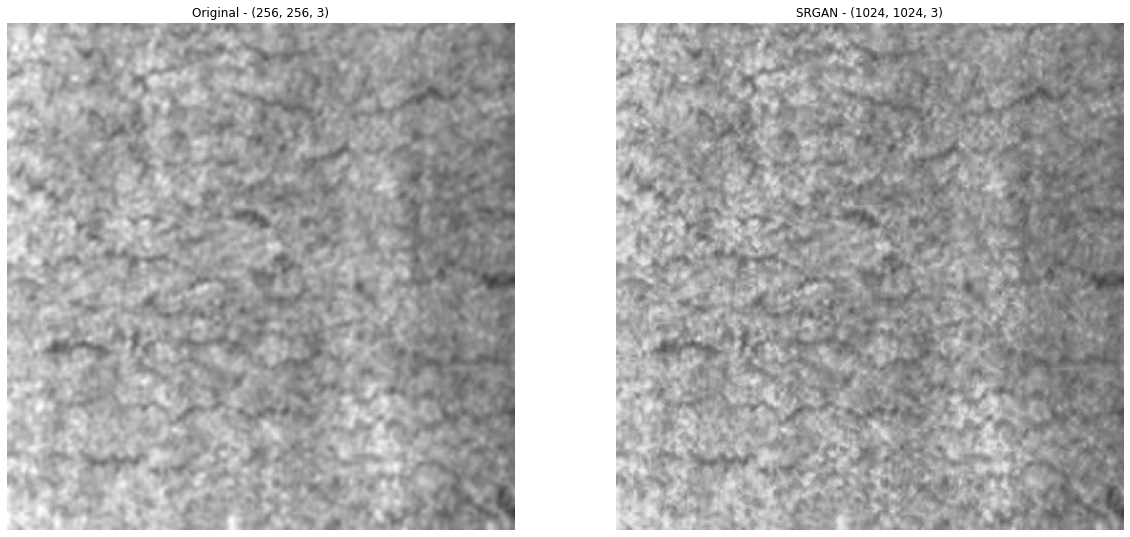

In [14]:

for i in range(0,1):
# Load image
  img_lr = DataLoader.load_img("/content/drive/MyDrive/crazing_1.jpg").astype(np.uint8)

  # Resize image (you can skip this if you are doing it on original image)
  img_lr = np.array(Image.fromarray(img_lr).resize((256,256), Image.BICUBIC))

  # Scale image
  img_lr = DataLoader.scale_lr_imgs(img_lr)

  # Predict high-resolution version (add batch dimension to image)
  img_sr = np.squeeze(
      gan.generator.predict(
          np.expand_dims(img_lr, 0), 
          batch_size=1
      ), 
      axis=0
  )

  # Unscale colors
  img_sr = DataLoader.unscale_hr_imgs(img_sr).astype(np.uint8)
  img_lr = DataLoader.unscale_lr_imgs(img_lr).astype(np.uint8)

  # Images and titles
  images = {
      'Original': img_lr, 
      'SRGAN': img_sr, 
  }
  import cv2
  cv2.imwrite("/content/drive/MyDrive/crazing_1.jpg",img_sr)
  # Plot the images. Note: rescaling and using squeeze since we are getting batches of size 1                    
  fig, axes = plt.subplots(1, 2, figsize=(20, 10))
  for i, (title, img) in enumerate(images.items()):    
      axes[i].imshow(img)
      axes[i].set_title("{} - {}".format(title, img.shape))
      axes[i].axis('off')
  plt.show()